In [1]:
%%time
import numpy as np
import pandas as pd
from data_explorer import  check,class_distribute,related_distribute,correlation_analyze,skewness_analyze,outliers_explorer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

CPU times: user 7.03 s, sys: 60.7 ms, total: 7.09 s
Wall time: 575 ms


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

--- Check Data ---
-----------Train------------
Shape of Train Data && .head() &&info && nunique && describe (18524, 9)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
5,5,2.0,No,8.0,5.0,No,NaN,3.0,Extrovert
6,6,1.0,No,8.0,NaN,No,NaN,4.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
8,8,4.0,Yes,2.0,1.0,NaN,0.0,2.0,Introvert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


id                           18524
Time_spent_Alone                12
Stage_fear                       2
Social_event_attendance         11
Going_outside                    8
Drained_after_socializing        2
Friends_circle_size             16
Post_frequency                  11
Personality                      2
dtype: int64

,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0


----missing value check----
id                            0.000000
Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64


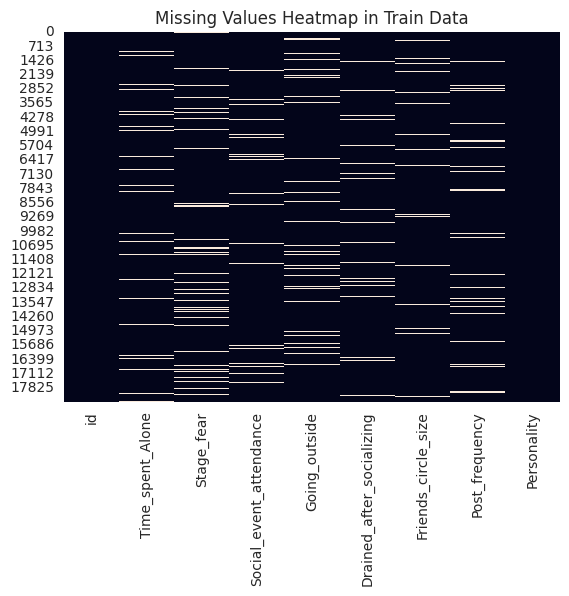

-----------Test------------
Shape of Test Data && .head() &&info && nunique (6175, 8)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
5,18529,2.0,No,5.0,3.0,No,10.0,4.0
6,18530,3.0,No,4.0,5.0,No,15.0,5.0
7,18531,11.0,Yes,2.0,1.0,Yes,4.0,1.0
8,18532,2.0,No,6.0,NaN,No,9.0,6.0
9,18533,8.0,NaN,2.0,1.0,Yes,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


id                           6175
Time_spent_Alone               12
Stage_fear                      2
Social_event_attendance        11
Going_outside                   8
Drained_after_socializing       2
Friends_circle_size            16
Post_frequency                 11
dtype: int64

,count,mean,std,min,25%,50%,75%,max
id,6175.0,21611.000000,1782.713288,18524.0,20067.5,21611.0,23154.5,24698.0
Time_spent_Alone,5750.0,3.116870,2.985658,0.0,1.0,2.0,4.0,11.0
Social_event_attendance,5778.0,5.287989,2.758052,0.0,3.0,5.0,8.0,10.0
Going_outside,5709.0,4.037835,2.045207,0.0,3.0,4.0,6.0,7.0
Friends_circle_size,5825.0,8.008412,4.192701,0.0,5.0,8.0,12.0,15.0
Post_frequency,5767.0,5.028958,2.867285,0.0,3.0,5.0,7.0,10.0


----missing value check----
id                           0.000000
Time_spent_Alone             2.294321
Stage_fear                   3.228244
Social_event_attendance      2.143166
Going_outside                2.515655
Drained_after_socializing    2.332110
Friends_circle_size          1.889441
Post_frequency               2.202548
dtype: float64


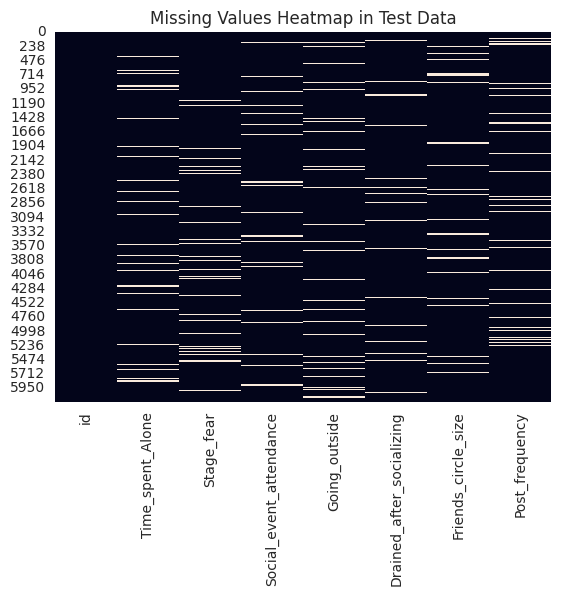

In [3]:
check(df_train, df_test)

In [4]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']

for col in numerical_cols:
    median_val = df_train[col].median()
    df_train[col].fillna(median_val, inplace=True)

In [5]:
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

for col in categorical_cols:
    mode_val = df_train[col].mode()[0]
    df_train[col].fillna(mode_val, inplace=True)

In [6]:
df_train.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

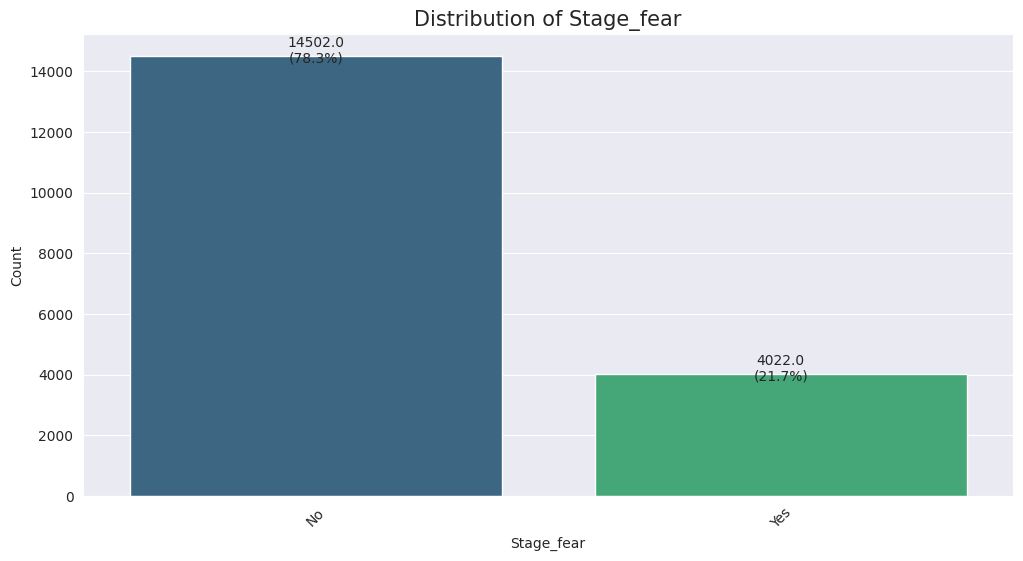

In [7]:
class_distribute(df_train, 'Stage_fear')

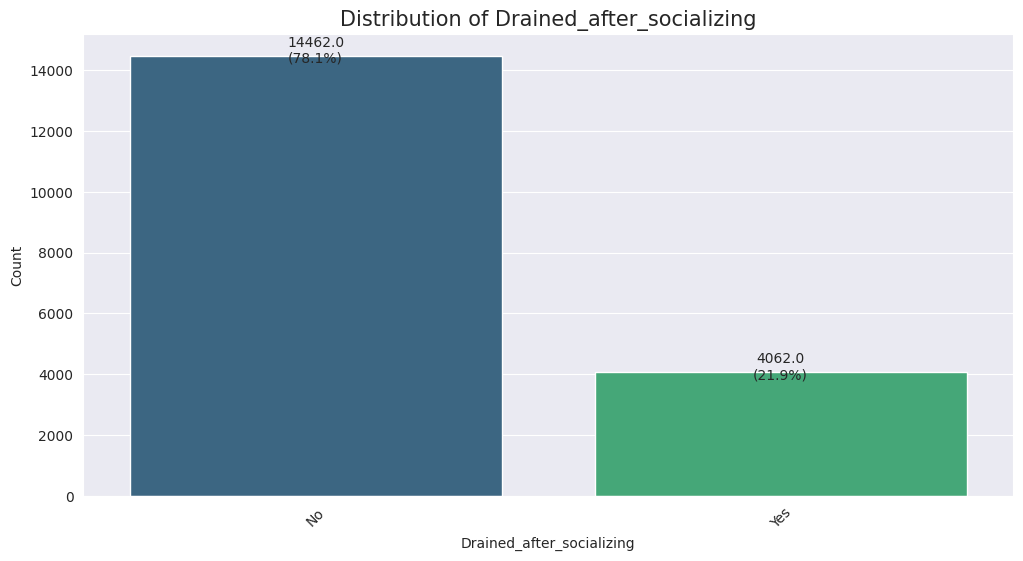

In [8]:
class_distribute(df_train, 'Drained_after_socializing')

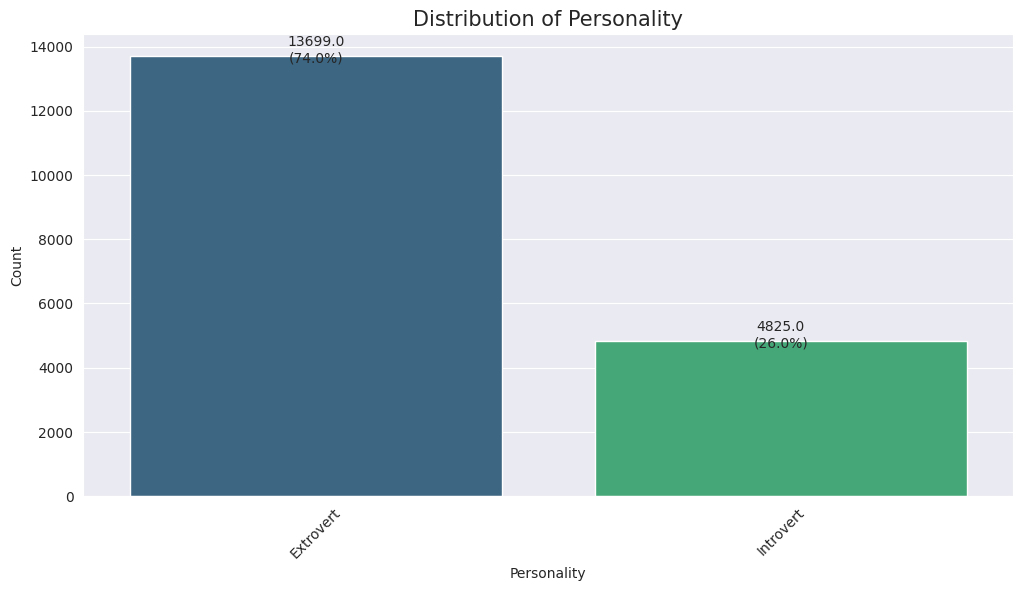

In [9]:
class_distribute(df_train, 'Personality')

<Figure size 1000x2000 with 0 Axes>

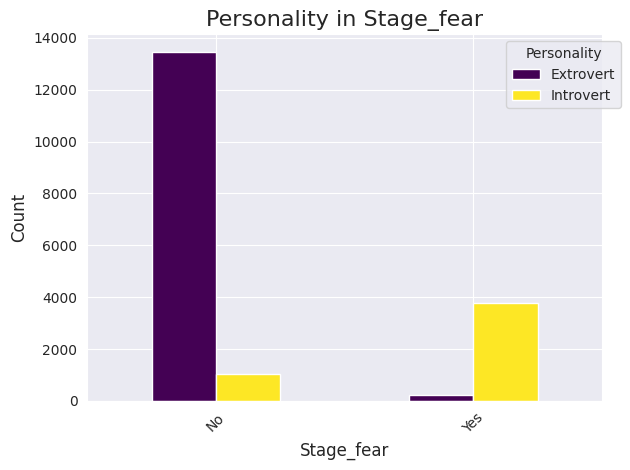

In [10]:
related_distribute(df_train, 'Stage_fear', 'Personality')

<Figure size 1000x2000 with 0 Axes>

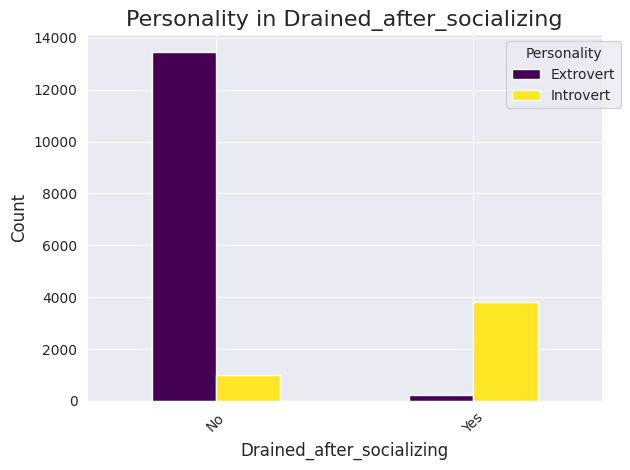

In [11]:
related_distribute(df_train, 'Drained_after_socializing', 'Personality')

### Insights

这个数据集中大多数人没有舞台恐惧,这个数据集中大多数人没有舞台恐惧,大多数人都是外向者,

很明显有舞台经验的人中，大多数是内向者;

社交后感到疲惫的人，大多数是内向者

In [12]:
numerical_df = df_train.select_dtypes(include=['int64', 'float64'])

In [13]:
numerical_df.columns

Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

numerical_cols used = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
--- 开始对 5 个数值列进行两两相关性分析 ---


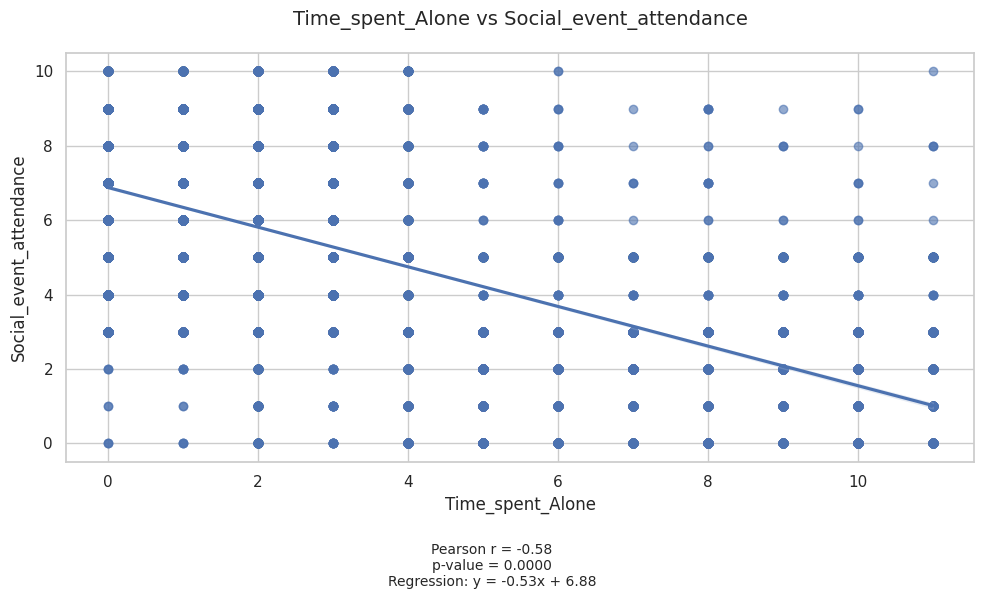


[解读] Time_spent_Alone vs Social_event_attendance:
  - 两者之间存在 中等 的 负向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


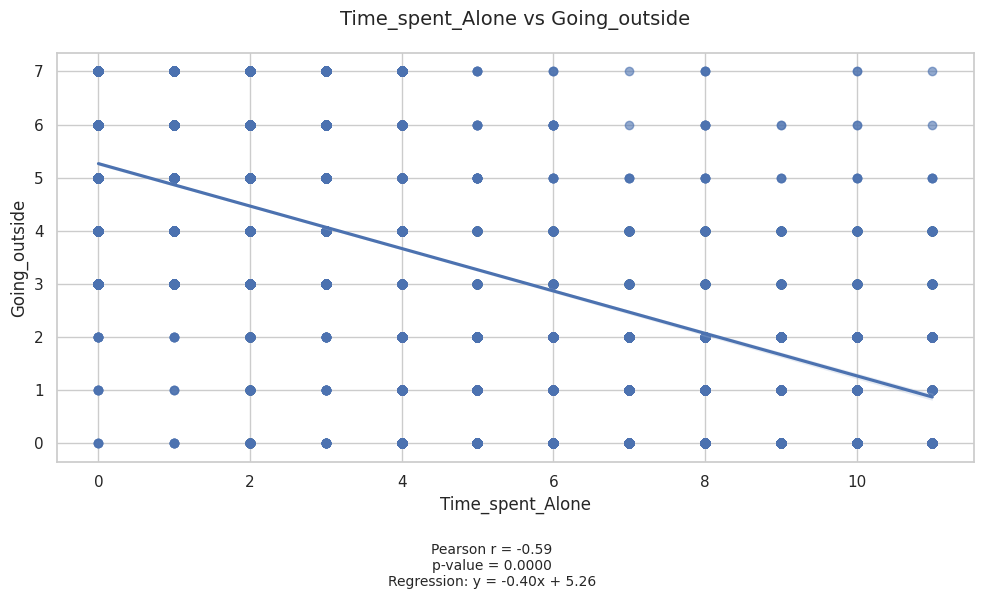


[解读] Time_spent_Alone vs Going_outside:
  - 两者之间存在 中等 的 负向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


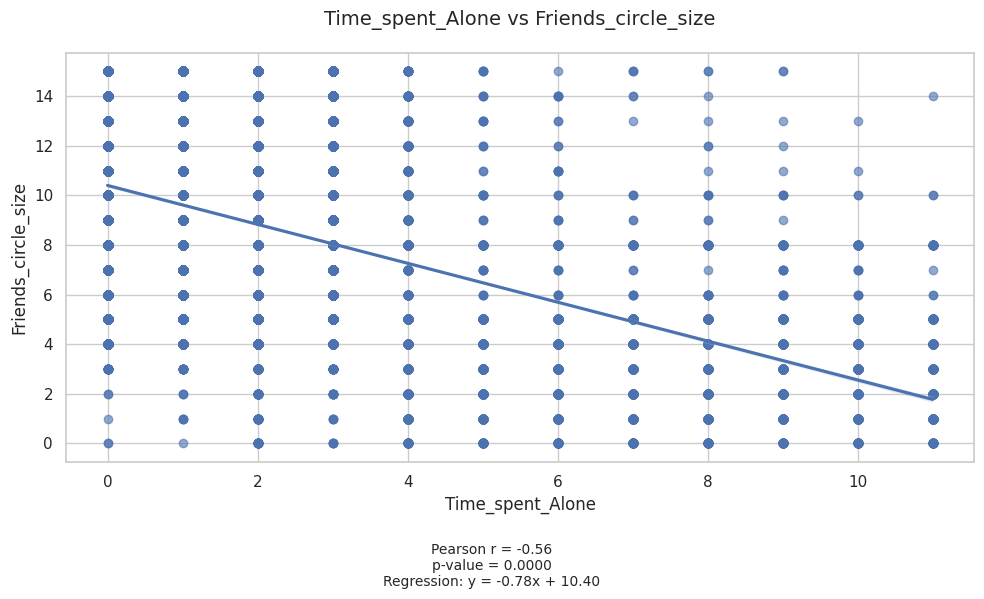


[解读] Time_spent_Alone vs Friends_circle_size:
  - 两者之间存在 中等 的 负向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


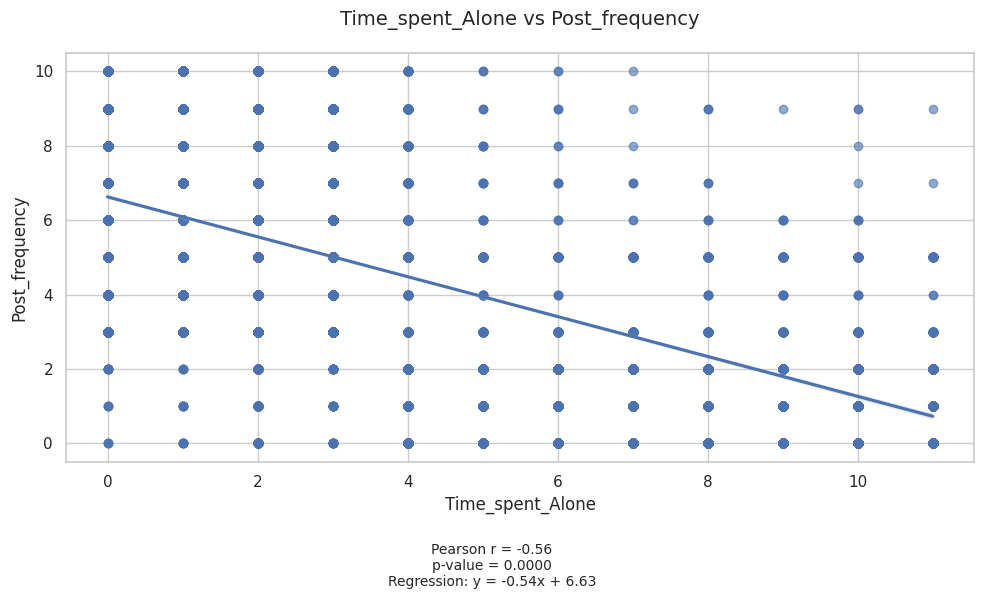


[解读] Time_spent_Alone vs Post_frequency:
  - 两者之间存在 中等 的 负向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


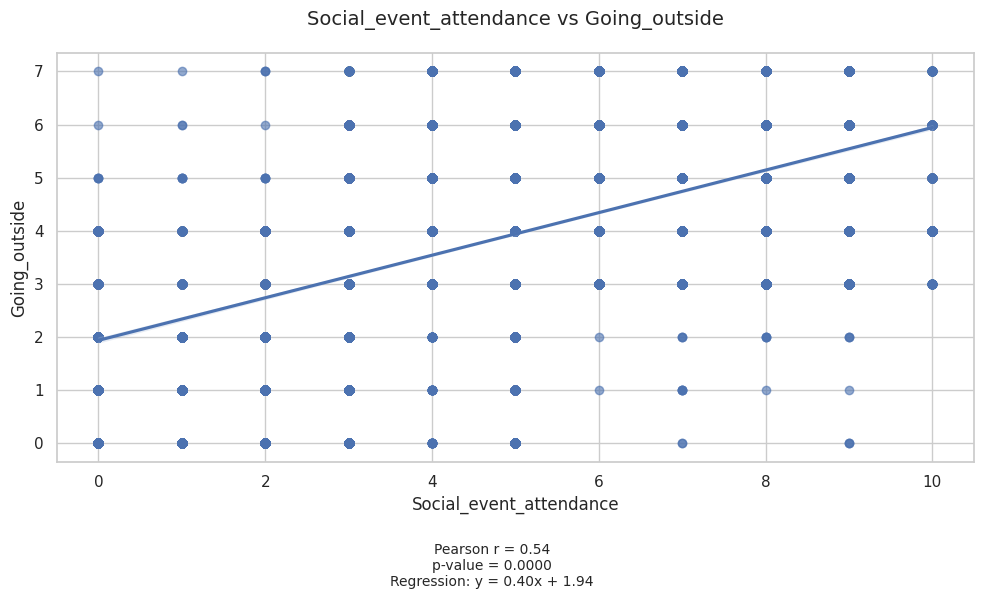


[解读] Social_event_attendance vs Going_outside:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


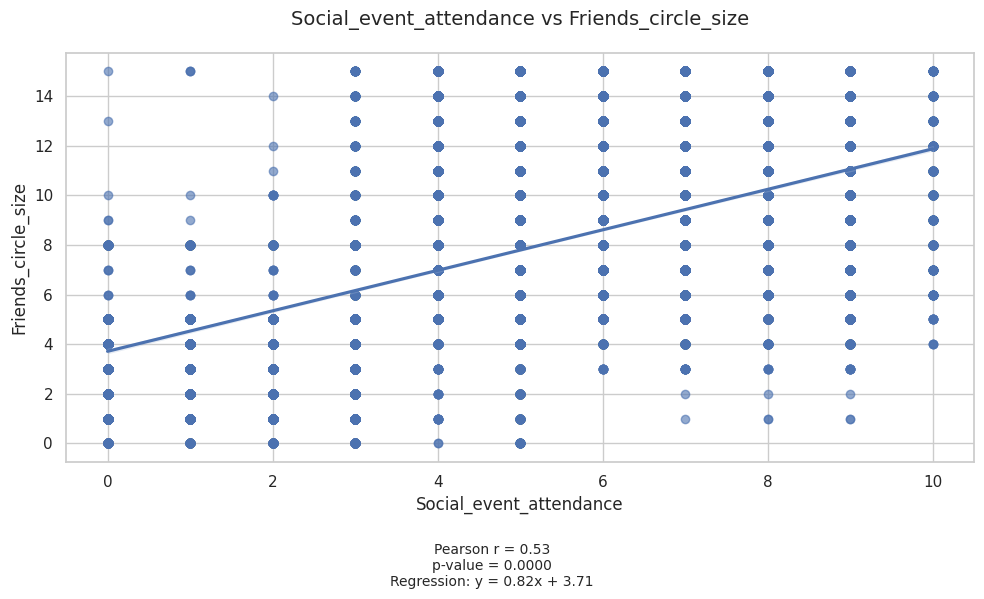


[解读] Social_event_attendance vs Friends_circle_size:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


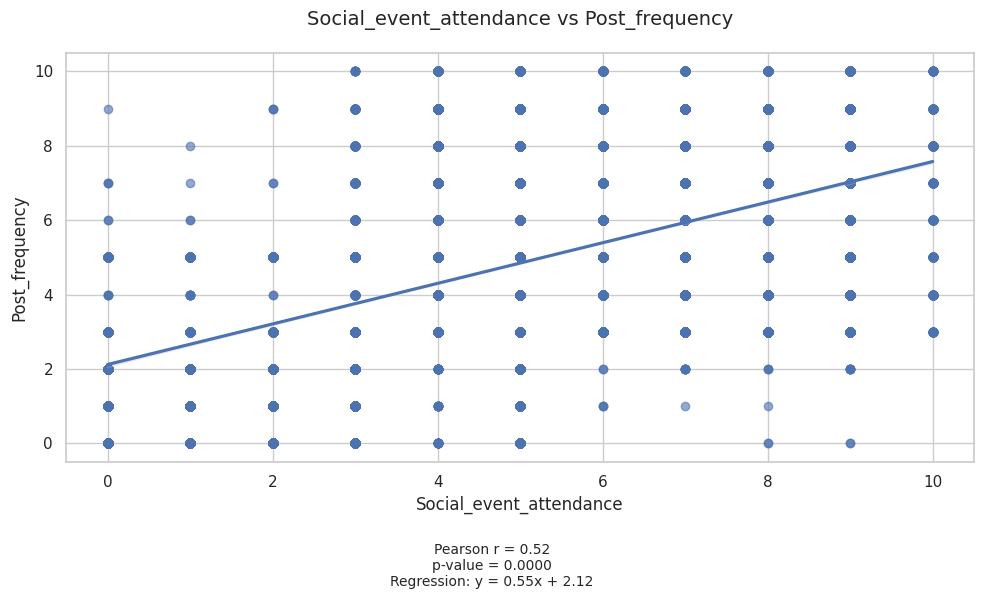


[解读] Social_event_attendance vs Post_frequency:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


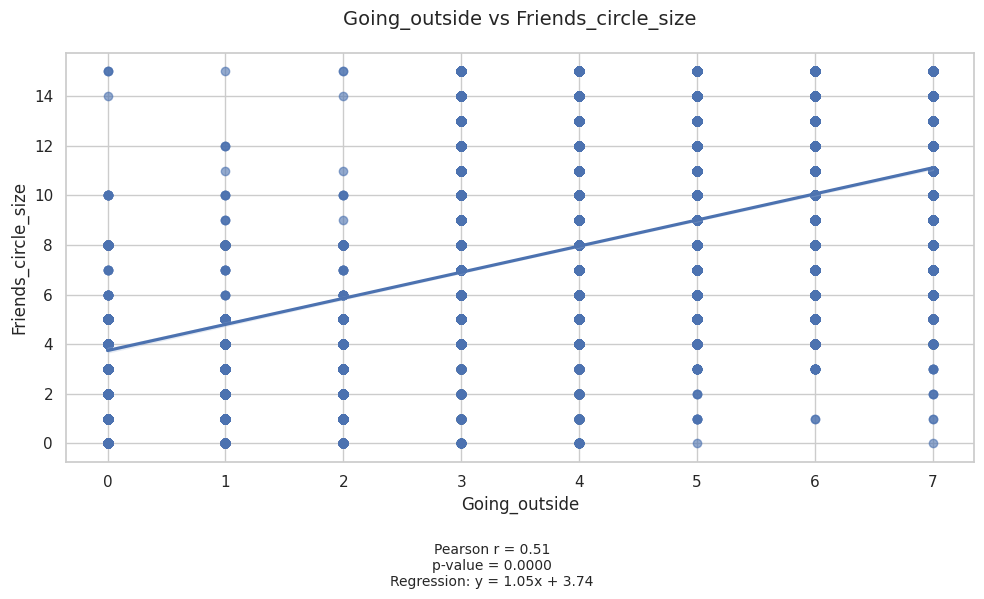


[解读] Going_outside vs Friends_circle_size:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


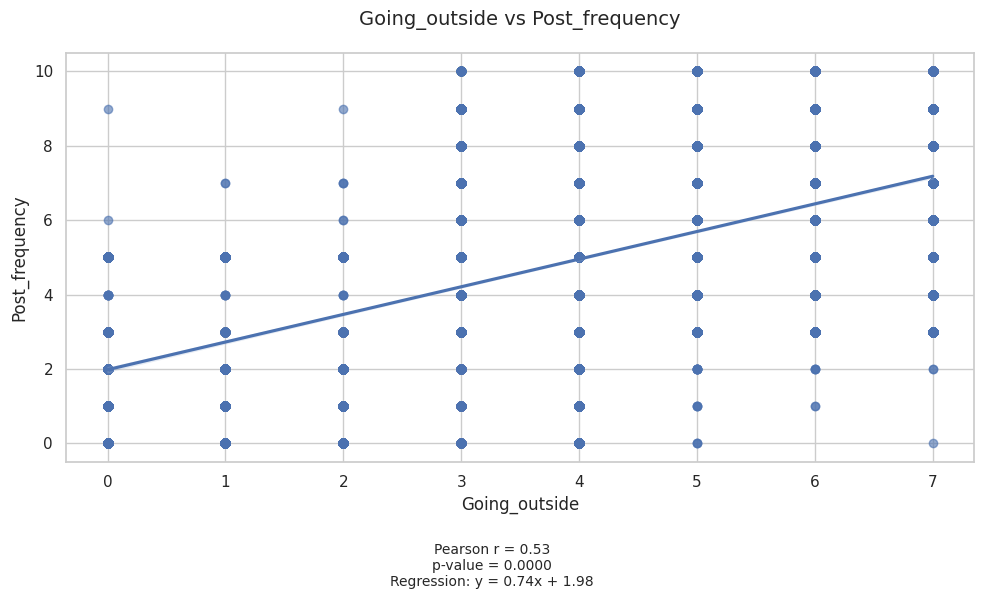


[解读] Going_outside vs Post_frequency:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


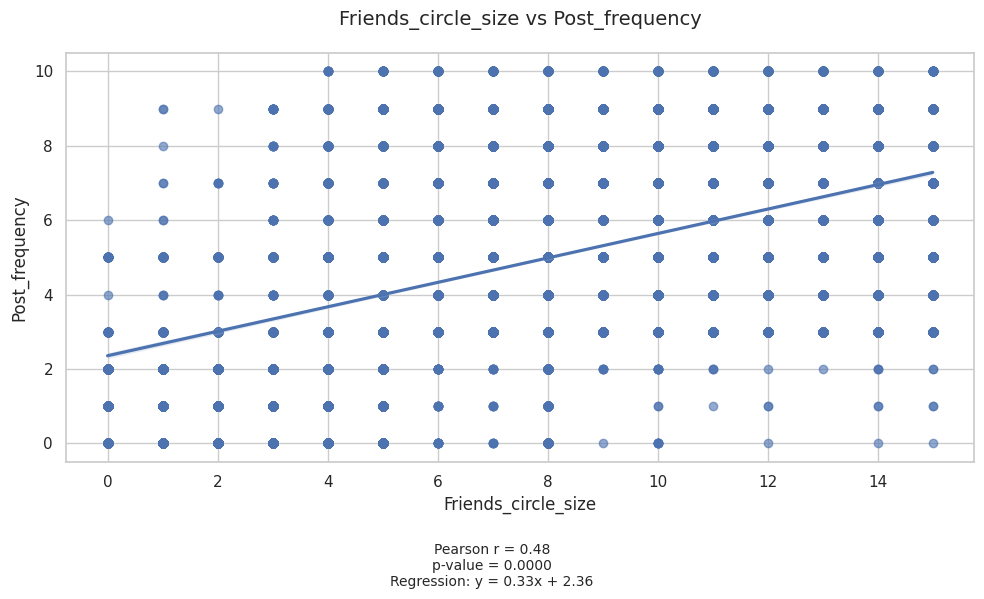


[解读] Friends_circle_size vs Post_frequency:
  - 两者之间存在 中等 的 正向 线性关系。
  - 这种相关性是 统计上高度显著 (p < 0.001)。
------------------------------------------------------------


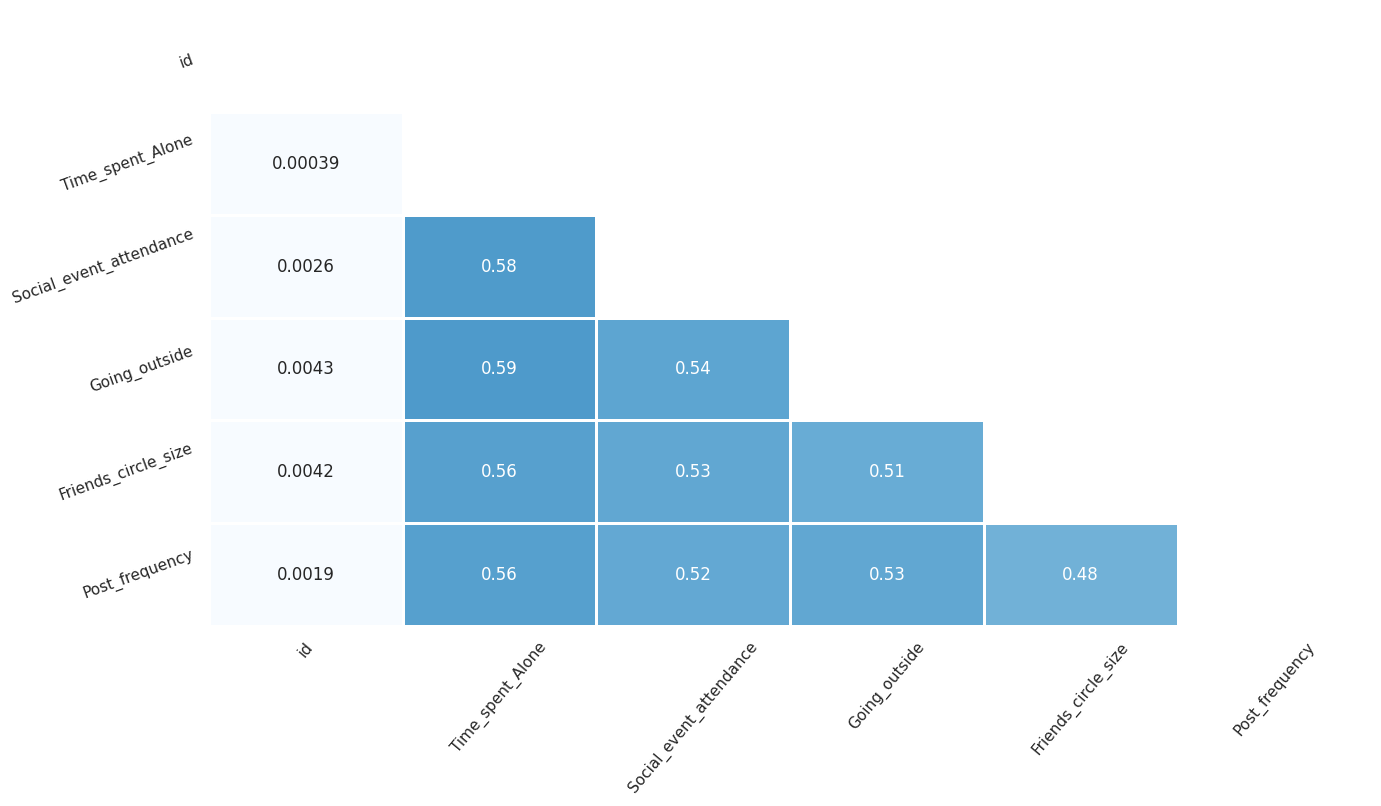

In [14]:
correlation_analyze(df_train)

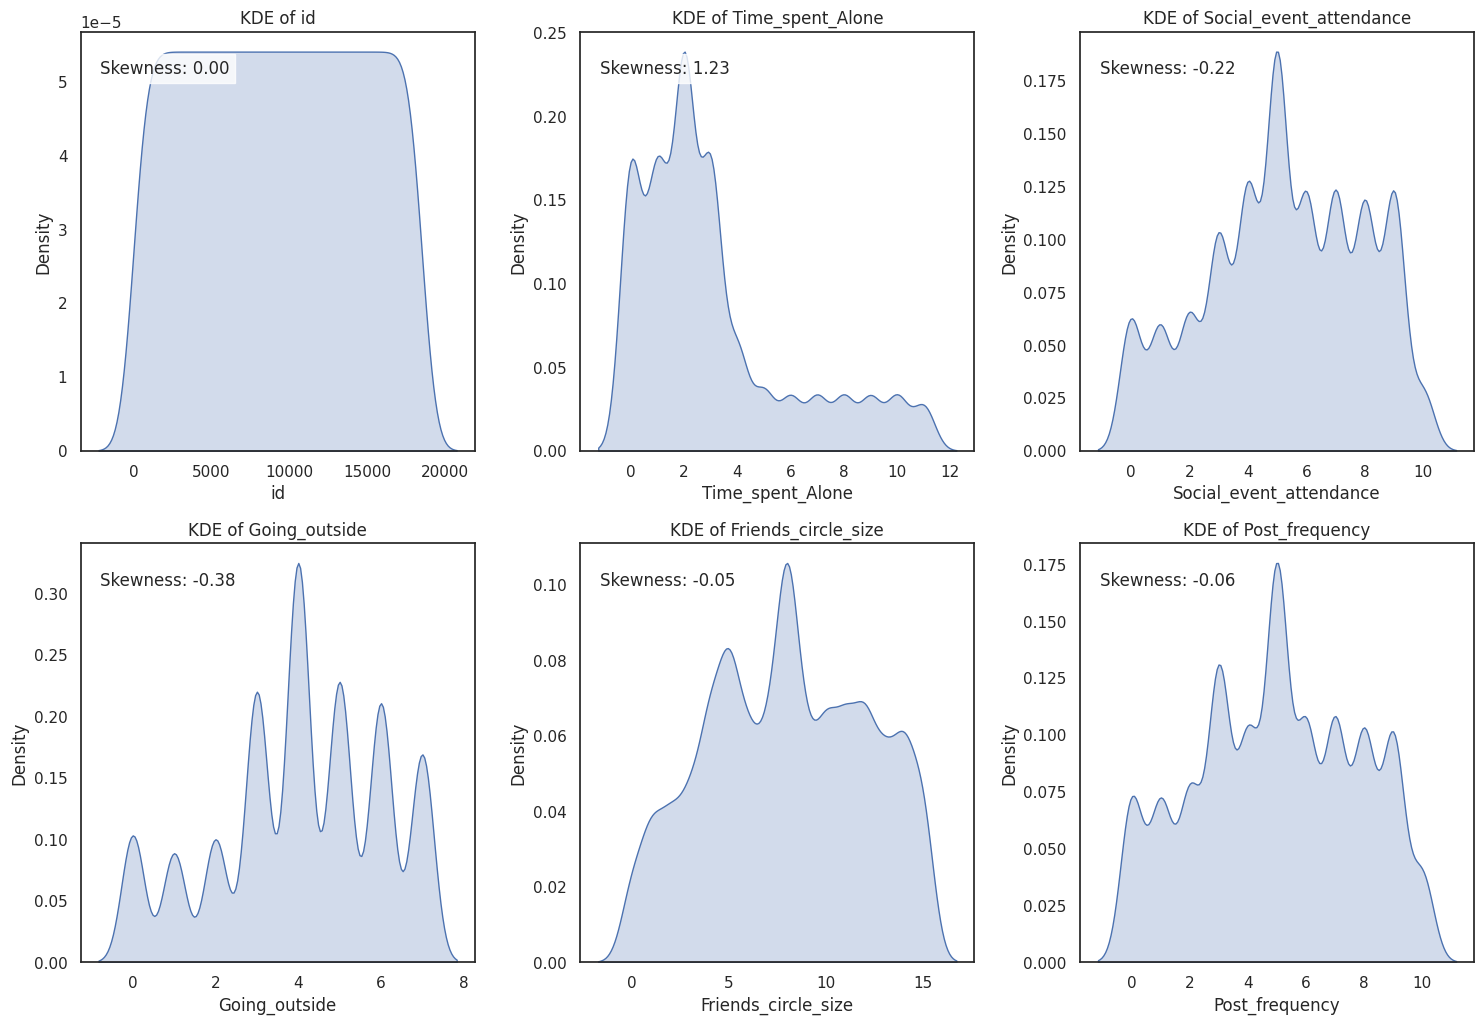

In [15]:
skewness_analyze(df_train)

### Insight

数据集显示变量之间存在中等程度的相关性，无论是正相关还是负相关

独自花费时间这一列存在显著的高相关性，也有一些异常值

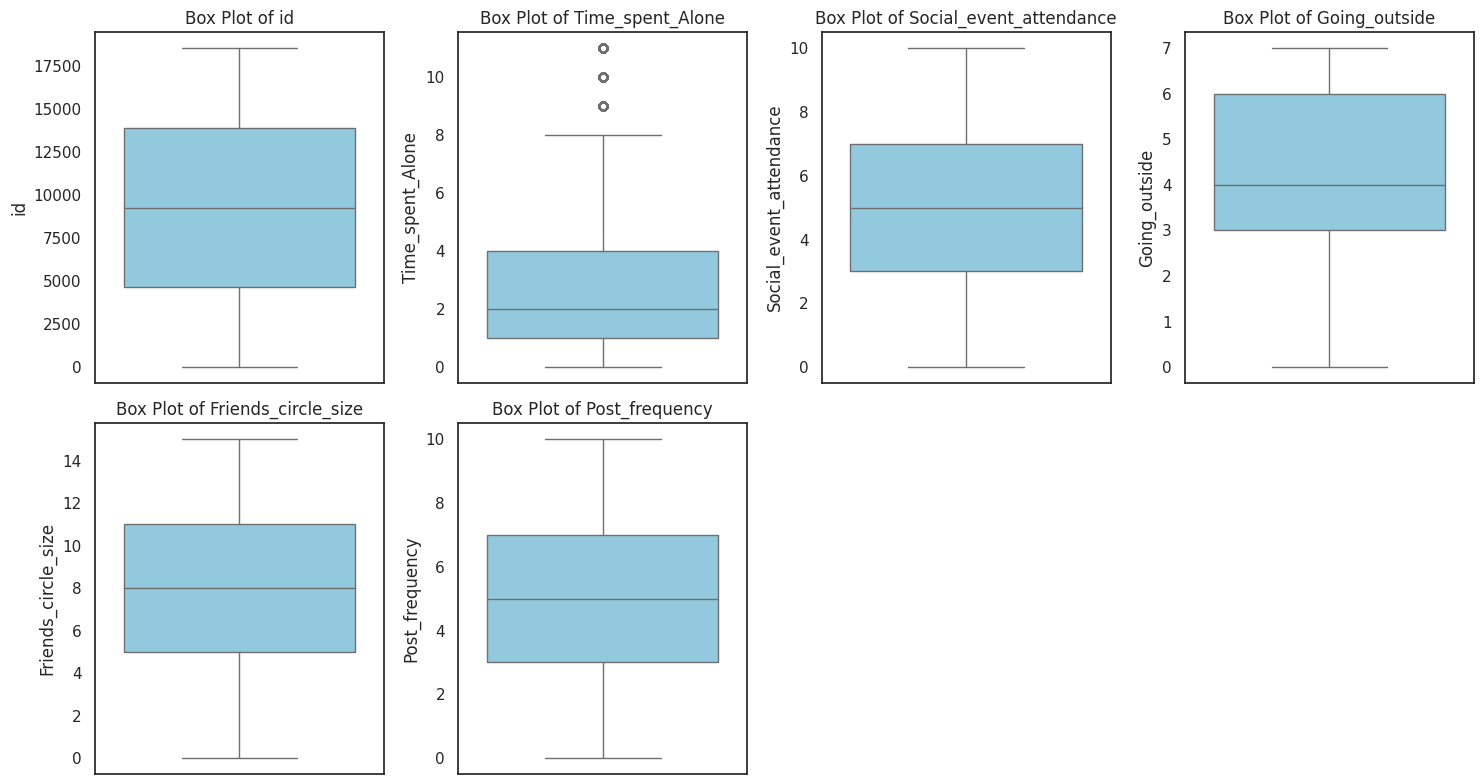

In [16]:
outliers_explorer(df_train)

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance as lgb_plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import optuna


def preprocess_and_engineer_features(df, is_train=True, scaler=None):
    df = df.copy()

    ids = df['id'] if 'id' in df.columns else None

    if 'Personality' in df.columns:
        target = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})
        df.drop('Personality', axis=1, inplace=True)
    else:
        target = None

    numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                      'Friends_circle_size', 'Post_frequency']
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)

    categorical_cols = ['Stage_fear', 'Drained_after_socializing']
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    df['Time_spent_Alone_log'] = np.log1p(df['Time_spent_Alone'])
    df['Post_frequency_log'] = np.log1p(df['Post_frequency'])

    df['Social_activity_score'] = (
        df['Social_event_attendance'] +
        df['Going_outside'] +
        df['Friends_circle_size'] +
        df['Post_frequency']
    )
    df['Solitude_ratio'] = df['Time_spent_Alone'] / (df['Going_outside'] + 1e-3)
    df['Friends_x_Posts'] = df['Friends_circle_size'] * df['Post_frequency']
    df['Introvert_likelihood'] = (
        df['Time_spent_Alone'] * 1.5 -
        df['Friends_circle_size'] -
        df['Post_frequency']
    )

    df['Alone_bin'] = pd.qcut(df['Time_spent_Alone'], q=3, labels=[0, 1, 2])
    df['Alone_bin'] = df['Alone_bin'].astype(int)

    df.drop(['id'], axis=1, errors='ignore', inplace=True)
    df = pd.get_dummies(df, drop_first=True)

    if is_train:
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)
    else:
        if scaler is None:
            raise ValueError("Scaler must be provided when is_train=False")
        df_scaled = scaler.transform(df)

    return df_scaled, target, ids, scaler


def objective(trial, X, y):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'random_state': 42
    }
    model = XGBClassifier(**param)
    return cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()


def train_and_evaluate(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=30)

    print("\nBest Optuna Parameters:", study.best_params)

    best_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    best_model.fit(X_train, y_train)
    val_preds = best_model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    print(f"\nTuned XGBoost Validation Accuracy: {acc:.4f}")
    print(classification_report(y_val, val_preds))

    plt.figure(figsize=(12, 6))
    plot_importance(best_model, max_num_features=15)
    plt.title("Top Feature Importances")
    plt.tight_layout()
    plt.show()

    return best_model


def generate_submission(model, test_df, scaler, filename='submission.csv'):
    X_test, _, ids, _ = preprocess_and_engineer_features(test_df, is_train=False, scaler=scaler)
    preds = model.predict(X_test)
    submission = pd.DataFrame({
        'id': ids,
        'Personality': np.where(preds == 0, 'Introvert', 'Extrovert')
    })
    submission.to_csv(filename, index=False)
    print(f"📁 Submission file saved as {filename}")

[I 2025-07-12 18:10:31,366] A new study created in memory with name: no-name-5a0eea8c-7518-4014-b6e5-d4f140add56d
[I 2025-07-12 18:10:40,143] Trial 0 finished with value: 0.9690936758027366 and parameters: {'n_estimators': 209, 'max_depth': 9, 'learning_rate': 0.03341660977199326, 'subsample': 0.8997828160756318, 'colsample_bytree': 0.6118126151042772}. Best is trial 0 with value: 0.9690936758027366.
[I 2025-07-12 18:10:49,531] Trial 1 finished with value: 0.9665295732386341 and parameters: {'n_estimators': 365, 'max_depth': 8, 'learning_rate': 0.06348440365076224, 'subsample': 0.9001380444761391, 'colsample_bytree': 0.974872478912278}. Best is trial 0 with value: 0.9690936758027366.
[I 2025-07-12 18:10:50,280] Trial 2 finished with value: 0.9690936985757315 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.2560938493195592, 'subsample': 0.5737386693684802, 'colsample_bytree': 0.6201402555244826}. Best is trial 2 with value: 0.9690936985757315.
[I 2025-07-12 18:1


Best Optuna Parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.026900682332656144, 'subsample': 0.6703635562043333, 'colsample_bytree': 0.7890116978602343}

Tuned XGBoost Validation Accuracy: 0.9655
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.97      0.97      0.97      3705



<Figure size 1200x600 with 0 Axes>

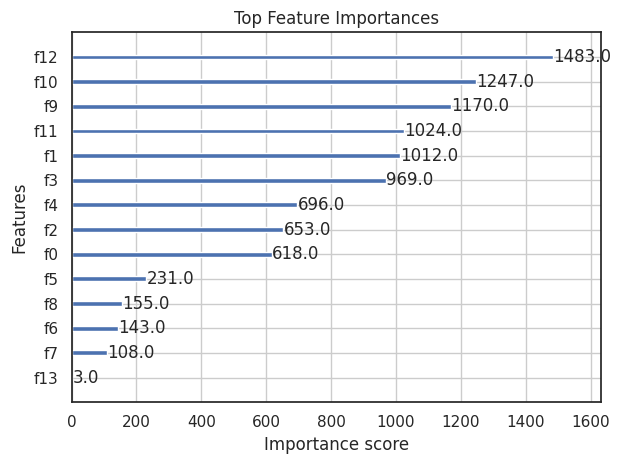

In [18]:
# TRAIN
X_train, y_train, _, scaler = preprocess_and_engineer_features(df_train, is_train=True)

# Train model
best_model = train_and_evaluate(X_train, y_train)

In [20]:
test_df = pd.read_csv("test.csv")

In [21]:
print(test_df.columns)

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')


In [22]:
# TEST
generate_submission(best_model, test_df, scaler)

📁 Submission file saved as submission.csv
